In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_C_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,NaN,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,NaN,NaN,NaN,3.0,1.0,1.0
3,6.0,8.0,8.0,NaN,3.0,4.0,3.0,NaN,1.0
4,4.0,1.0,1.0,NaN,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,NaN,2.0,1.0,2.0,1.0,1.0
679,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
680,5.0,NaN,10.0,10.0,4.0,NaN,5.0,6.0,3.0
681,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	65
float64		column 2	69
float64		column 3	78
float64		column 4	74
float64		column 5	53
float64		column 6	69
float64		column 7	66
float64		column 8	66
float64		column 9	74


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,618.000000,614.000000,605.000000,609.000000,630.000000,614.000000,617.000000,617.000000,609.000000
mean,4.448220,3.159609,3.261157,2.839080,3.257143,3.553746,3.458671,2.797407,1.643678
std,2.844667,3.082434,3.028763,2.872347,2.235123,3.636799,2.468370,3.023092,1.788890
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

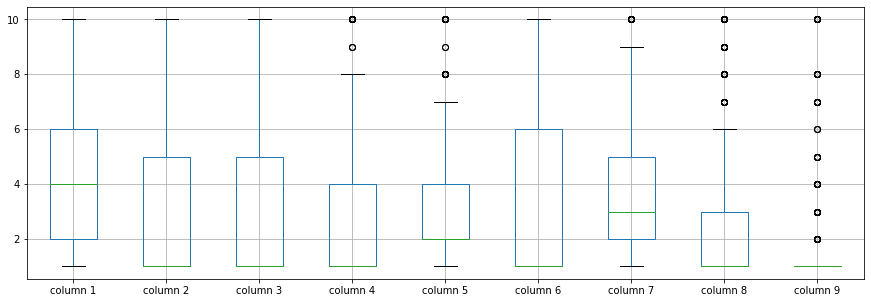

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.448220
column 2    3.159609
column 3    3.261157
column 4    2.839080
column 5    3.257143
column 6    3.553746
column 7    3.458671
column 8    2.797407
column 9    1.643678
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.643583,0.652820,0.474598,0.538674,0.592796,0.559473,0.549382,0.349584
column 2,0.643583,1.000000,0.910514,0.698264,0.767427,0.673190,0.767485,0.722621,0.478382
column 3,0.652820,0.910514,1.000000,0.679236,0.734685,0.704683,0.729179,0.713213,0.471938
column 4,0.474598,0.698264,0.679236,1.000000,0.588594,0.655296,0.666023,0.601141,0.432464
column 5,0.538674,0.767427,0.734685,0.588594,1.000000,0.592132,0.647782,0.628822,0.548413
column 6,0.592796,0.673190,0.704683,0.655296,0.592132,1.000000,0.660400,0.594992,0.367964
column 7,0.559473,0.767485,0.729179,0.666023,0.647782,0.660400,1.000000,0.671036,0.393557
column 8,0.549382,0.722621,0.713213,0.601141,0.628822,0.594992,0.671036,1.000000,0.441730
column 9,0.349584,0.478382,0.471938,0.432464,0.548413,0.367964,0.393557,0.441730,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+88,9+88+88,9+88+88,9+88+88+88+88,9+88+88+88,9+88+88,9+88,9], vae_layer = False, seed = 880)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 33.2673221769787
Epoch: 1 , loss: 32.831640561421715
Epoch: 2 , loss: 32.93926402500698
Epoch: 3 , loss: 31.52299454098656
Epoch: 4 , loss: 29.9904998143514
Epoch: 5 , loss: 28.619435923440115
Epoch: 6 , loss: 28.55144010271345
Epoch: 7 , loss: 27.486620085580007
Epoch: 8 , loss: 26.825703484671457
Epoch: 9 , loss: 26.82187573115031
Epoch: 10 , loss: 25.959979965573265
Epoch: 11 , loss: 25.688779444921586
Epoch: 12 , loss: 25.569820767357236
Epoch: 13 , loss: 24.94985142208281
Epoch: 14 , loss: 23.98826313018799
Epoch: 15 , loss: 24.36896560305641
Epoch: 16 , loss: 23.70306435085478
Epoch: 17 , loss: 23.529186748322985
Epoch: 18 , loss: 22.280996322631836
Epoch: 19 , loss: 22.904113655998593
Epoch: 20 , loss: 23.15717871983846
Epoch: 21 , loss: 21.87094359170823
Epoch: 22 , loss: 21.782860982985724
Epoch: 23 , loss: 21.627844855898903
Epoch: 24 , loss: 22.12099316006615
Epoch: 25 , loss: 21.829168024517

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    2.992774
column 2    1.000000
column 3    1.000000
column 4    1.000000
column 5    2.000000
column 6    2.579035
column 7    2.000000
column 8    1.000000
column 9    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.000000,0.0,0.000000,0.006499,0.000000,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,0.0,0.000000,0.0,0.109713,-0.765867,-0.630999,0.0,0.000000,0.0
3,0.0,0.000000,0.0,1.503683,0.000000,0.000000,0.0,-4.504158,0.0
4,0.0,0.000000,0.0,-2.074454,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
678,0.0,0.000000,0.0,-0.793187,0.000000,0.000000,0.0,0.000000,0.0
679,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
680,0.0,-4.045957,0.0,0.000000,0.000000,-3.186614,0.0,0.000000,0.0
681,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(67.70993137639566, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.2019213770056336

In [18]:
new_df.iloc[66,:]

column 1    1.000000
column 2    3.000000
column 3    3.000000
column 4    2.000000
column 5    2.000000
column 6    1.000000
column 7    7.757169
column 8    2.000000
column 9    1.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.000000,1.0,1.000000,2.006499,1.000000,3.0,1.000000,1.0
1,5.0,4.000000,4.0,5.000000,7.000000,10.000000,3.0,2.000000,1.0
2,3.0,1.000000,1.0,1.109713,1.234133,1.369001,3.0,1.000000,1.0
3,6.0,8.000000,8.0,2.503683,3.000000,4.000000,3.0,2.495842,1.0
4,4.0,1.000000,1.0,0.925546,2.000000,1.000000,3.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.000000,1.0,0.206813,2.000000,1.000000,2.0,1.000000,1.0
679,2.0,1.000000,1.0,1.000000,2.000000,1.000000,3.0,1.000000,1.0
680,5.0,5.954043,10.0,10.000000,4.000000,6.813386,5.0,6.000000,3.0
681,1.0,1.000000,1.0,3.000000,2.000000,1.000000,1.0,1.000000,1.0


In [20]:
imputations[-1].to_excel("BCW_C_10(imp).xlsx", index=False, header=False)